Dataset Dimensions: (178, 14)

First few rows of Wine dataset:
    Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  

Summary of Stats:
              Wine     Alcohol  Malic.acid         Ash         Acl          Mg  \
count  178.0

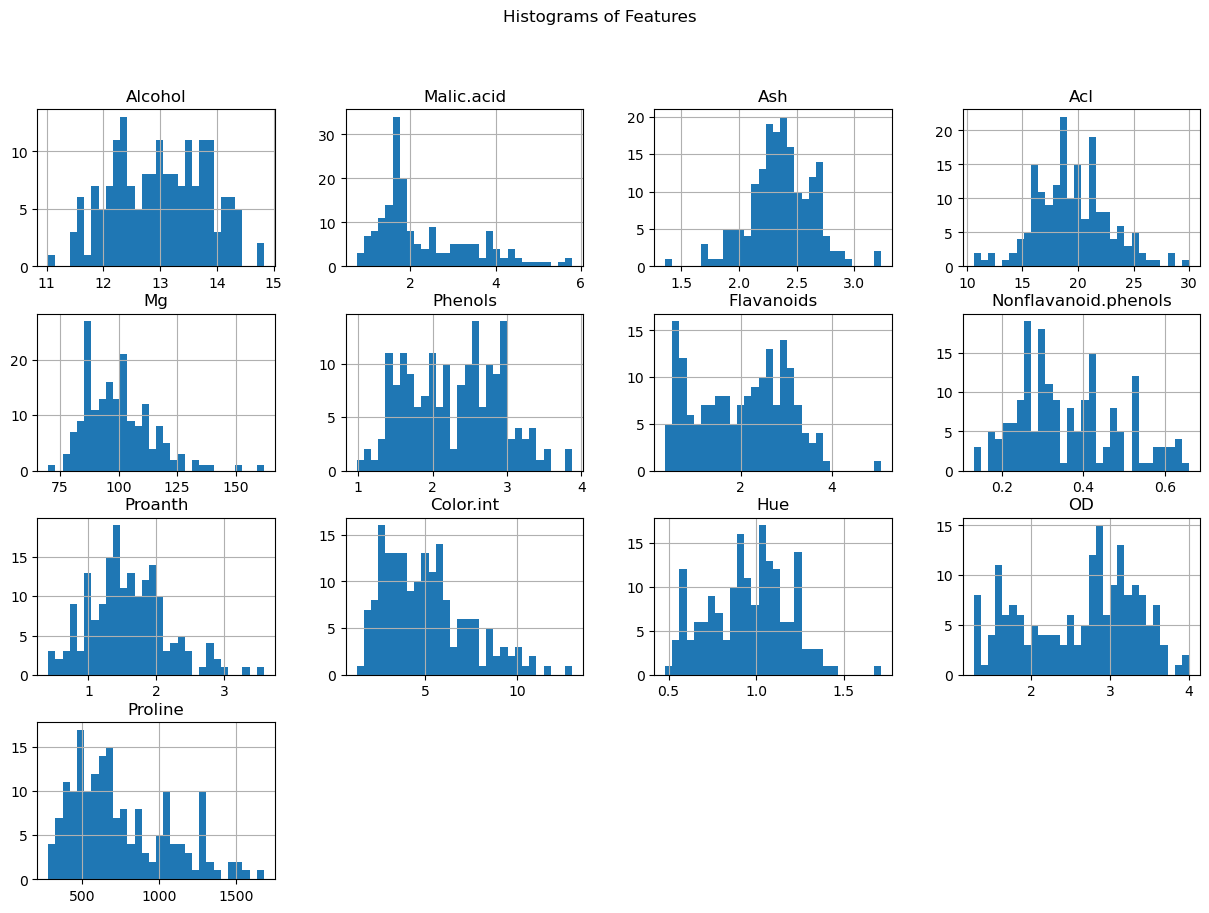

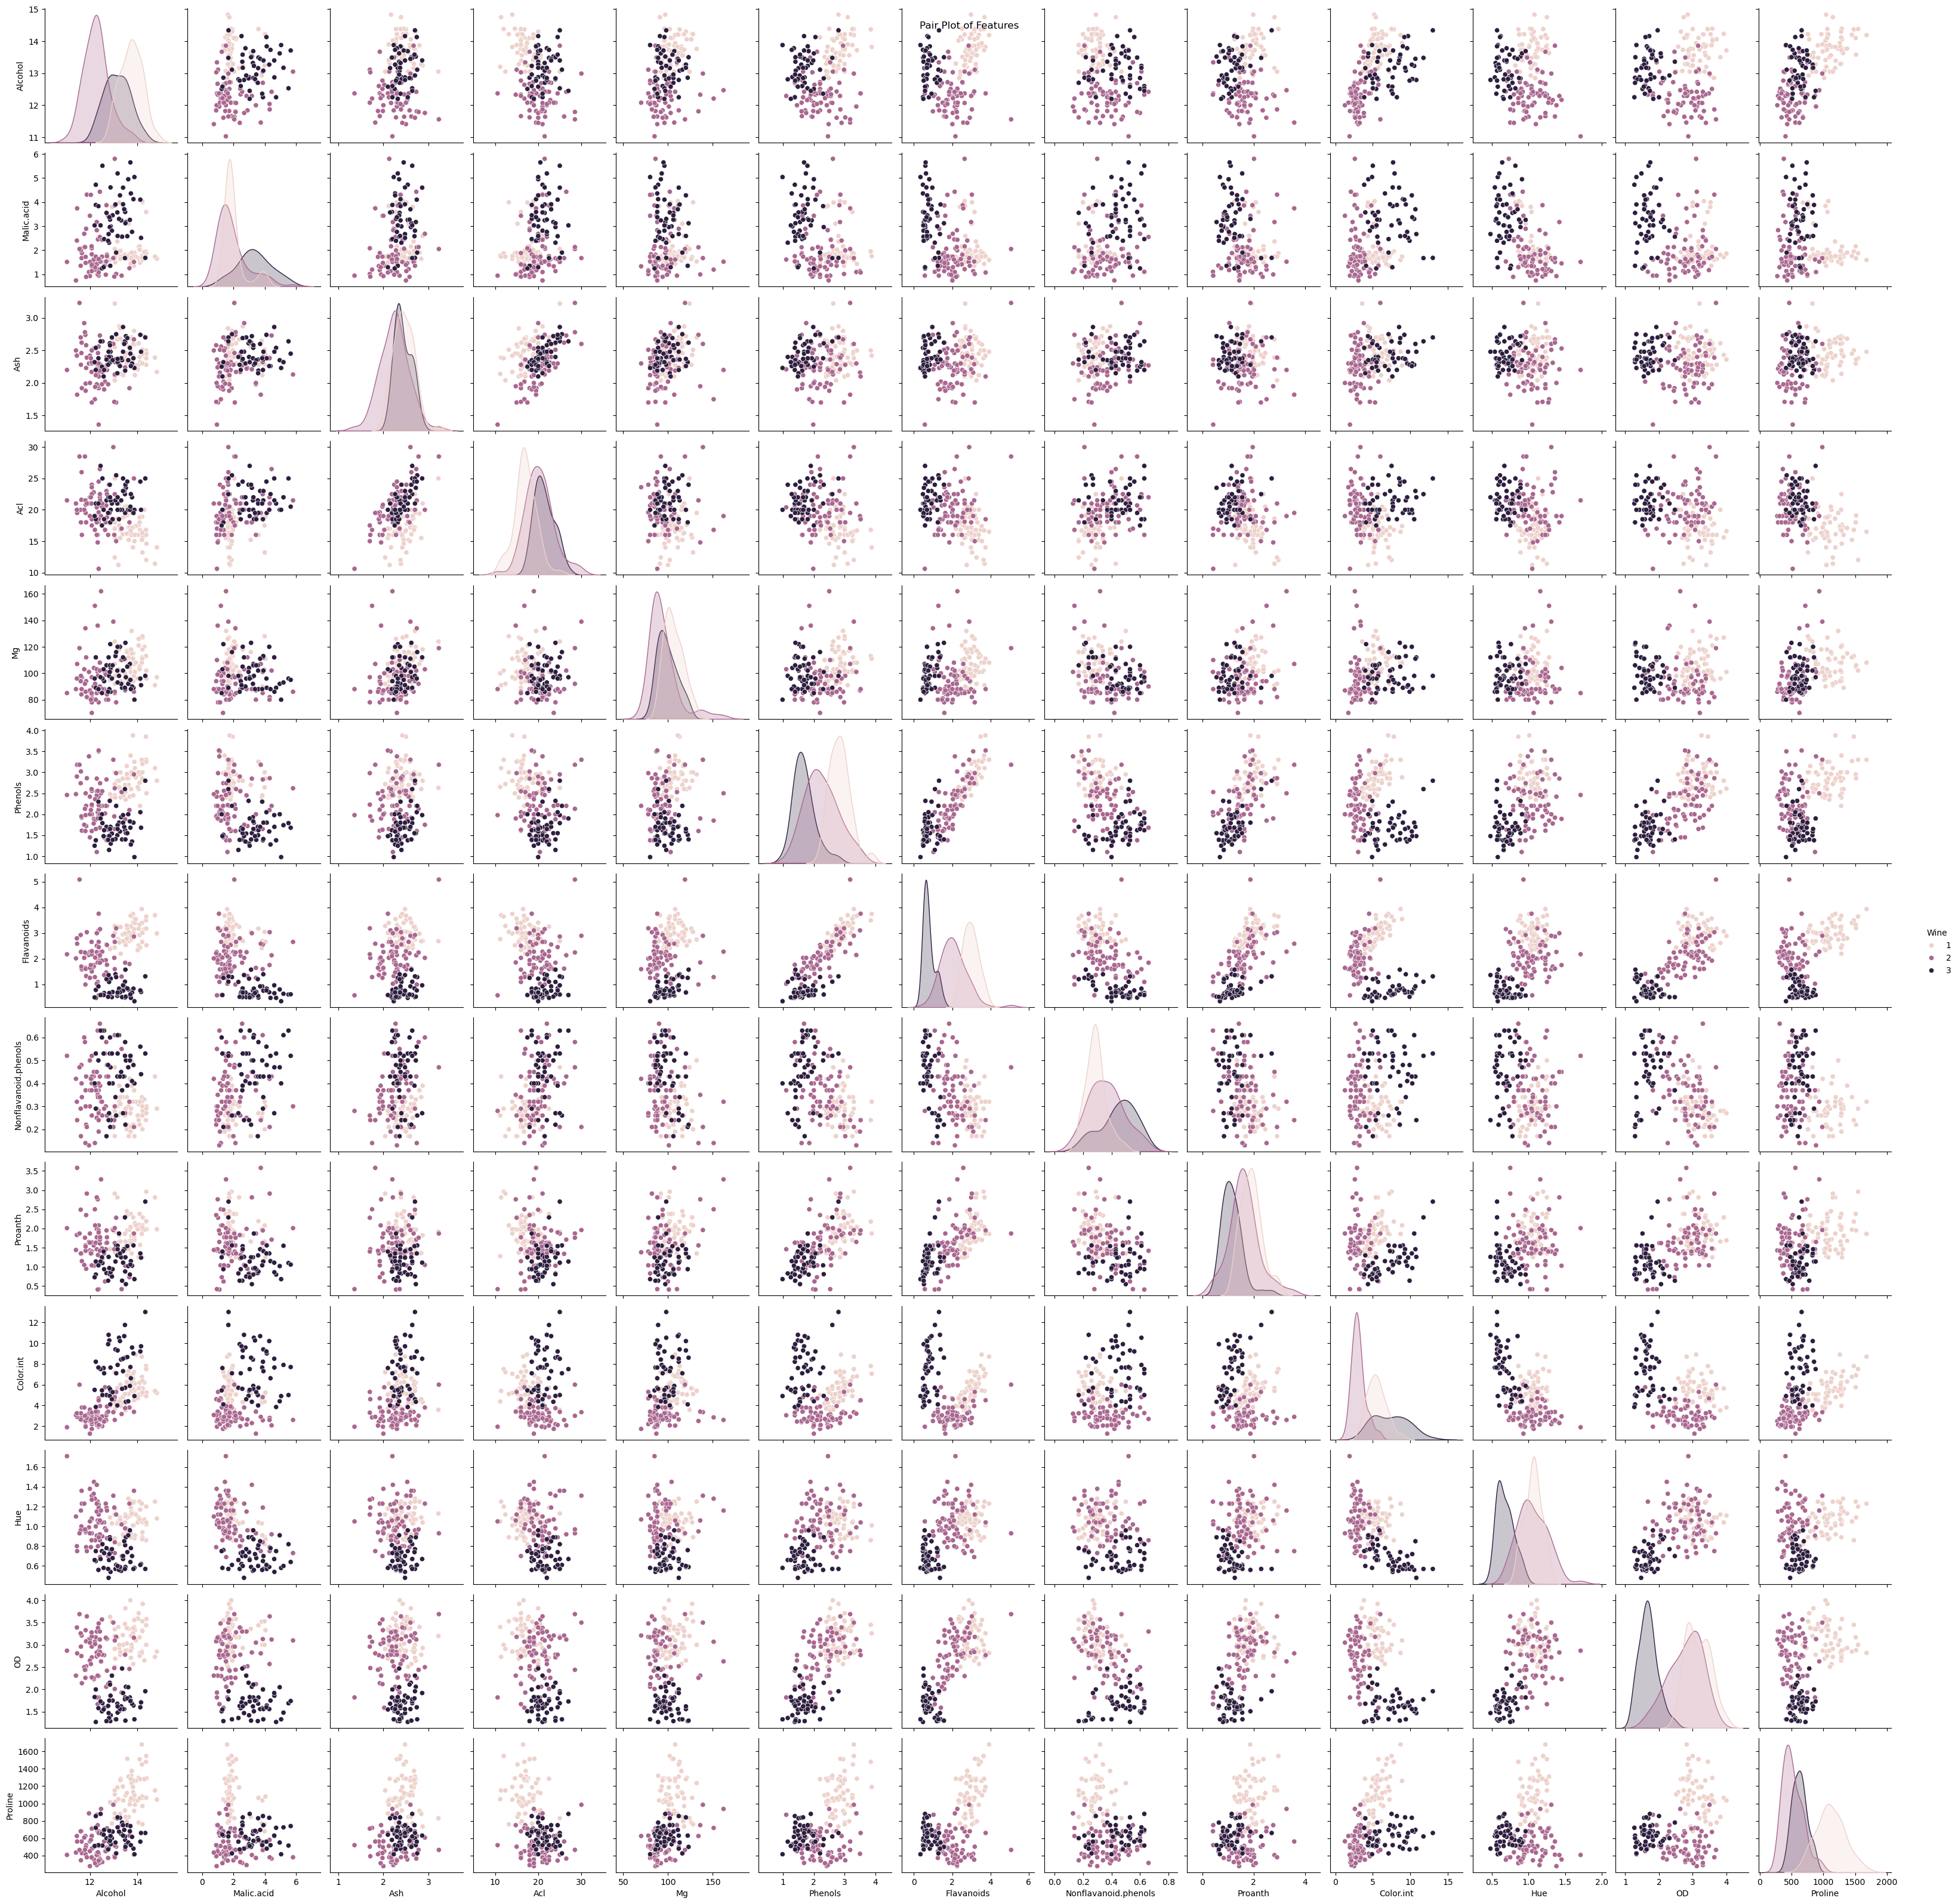

In [1]:
# Data Exploration

# -----------------------------

# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the 'wine.csv' dataset from the csv file
df = pd.read_csv('wine.csv')

# Output general dataset information 
print("Dataset Dimensions:", df.shape)
print("\nFirst few rows of Wine dataset:\n", df.head())
print("\nSummary of Stats:\n", df.describe())
print("\nWine Class Distribution:\n", df['Wine'].value_counts())

# Provide a visualization of the distribution for features
df.drop('Wine', axis=1).hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()

# Pair plot to visualize the relation between features
sns.pairplot(df, hue='Wine')
plt.suptitle('Pair Plot of Features')
plt.show()

In [2]:
# Data Preprocessing

# --------------------------------------------------

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset into features and target
X = df.drop('Wine', axis=1)
y = df['Wine']

# Check for any missing values
print("Missing Values:\n", X.isnull().sum())

# Scale the varying features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

Missing Values:
 Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64


In [5]:
# Model Selection

# ------------------------------------------------

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Initialize the models
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC(kernel='linear', probability=True)

# Train the models
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

k-NN Classification Result Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      0.86      0.92        21
           3       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

SVM Classification Result Report:
               precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       0.95      0.95      0.95        21
           3       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



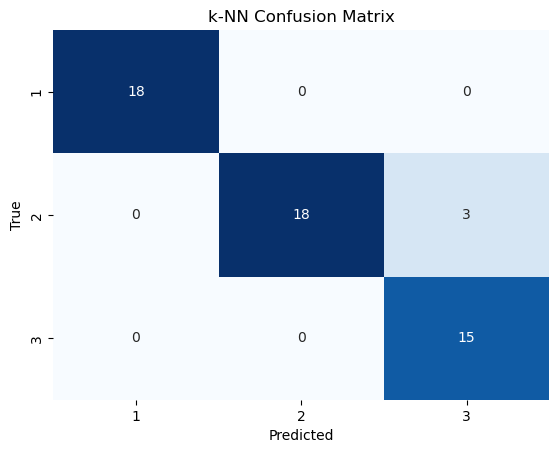

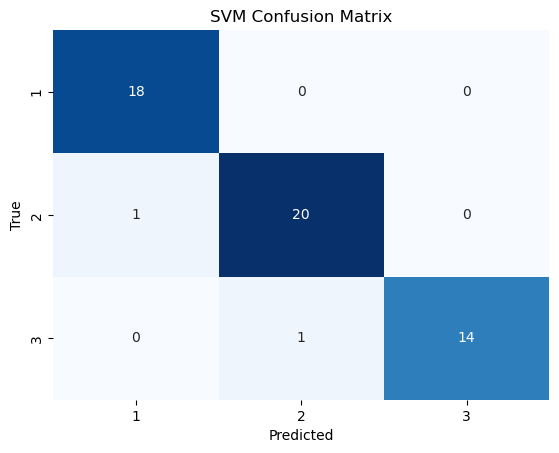

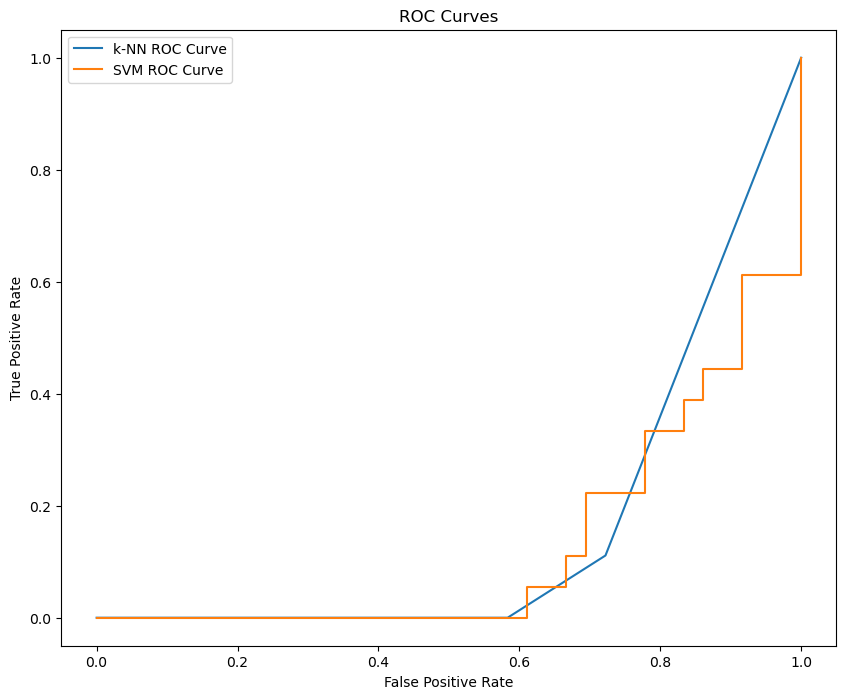

In [7]:
# Model Evaluation

# -------------------------------------------------------------------------------------------------

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

# Make model predictions
knn_preds = knn.predict(X_test)
svm_preds = svm.predict(X_test)

# Provide evaluation metrics
print("k-NN Classification Result Report:\n", classification_report(y_test, knn_preds))
print("SVM Classification Result Report:\n", classification_report(y_test, svm_preds))

# Implement Confusion Matrices
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=df['Wine'].unique(), yticklabels=df['Wine'].unique())
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Create k-NN confusion matrix
knn_cm = confusion_matrix(y_test, knn_preds)
plot_confusion_matrix(knn_cm, 'k-NN Confusion Matrix')

# Create SVM confusion matrix
svm_cm = confusion_matrix(y_test, svm_preds)
plot_confusion_matrix(svm_cm, 'SVM Confusion Matrix')

# Create then plot ROC Curve
def plot_roc_curve(model, X_test, y_test, label):
    probs = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, probs[:, 1], pos_label=1)
    plt.plot(fpr, tpr, label=label)
    
plt.figure(figsize=(10, 8))
plot_roc_curve(knn, X_test, y_test, 'k-NN ROC Curve')
plot_roc_curve(svm, X_test, y_test, 'SVM ROC Curve')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Feature Importance from SVM:
                  Feature  Importance
0                Alcohol    0.750437
12               Proline    0.699856
2                    Ash    0.463954
11                    OD    0.419356
9              Color.int    0.226177
7   Nonflavanoid.phenols    0.180126
4                     Mg    0.145424
5                Phenols    0.112535
6             Flavanoids    0.106162
1             Malic.acid    0.058815
8                Proanth   -0.255001
10                   Hue   -0.495576
3                    Acl   -0.588370


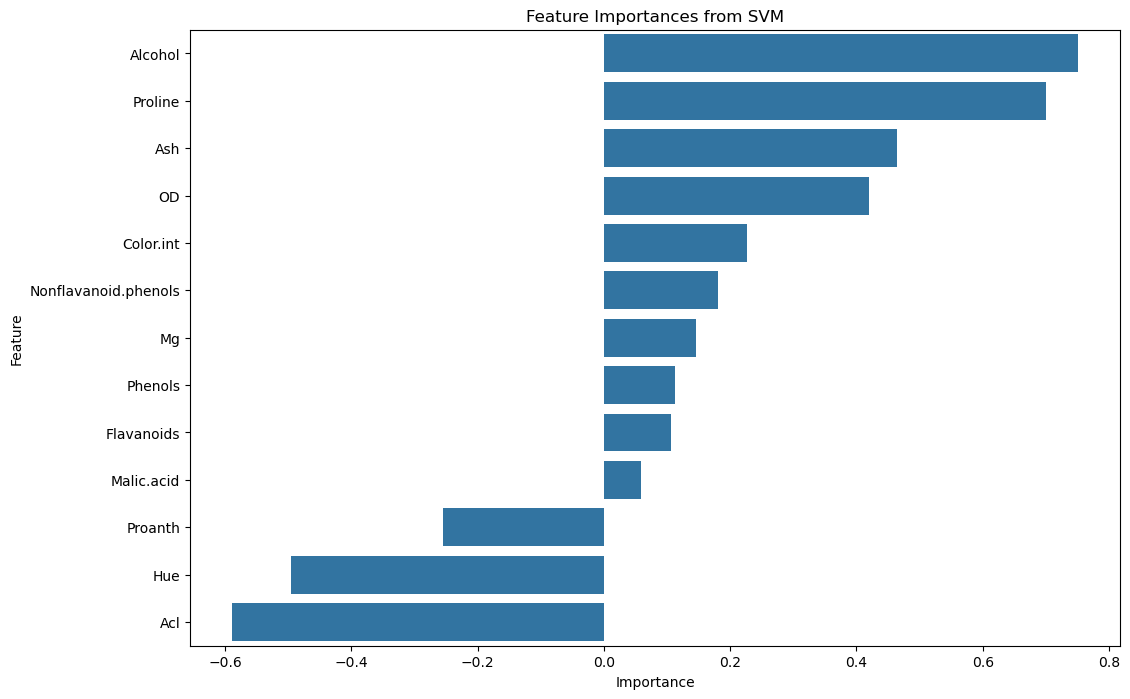

In [9]:
# Interpretation

# ------------------------------------------------

# Observe the SVM coefficients of the linear model.
def get_feature_importances(model, feature_names):
    return model.coef_[0]

# Feature Importance from SVM
svm_feature_importances = get_feature_importances(svm, X.columns)
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': svm_feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance from SVM:\n", importance_df)

# Plot the Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances from SVM')
plt.show()